## 1

In [1]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=5,
                           n_classes=2,
                           random_state=42)

In [2]:
X

array([[ 1.12510039,  1.17812384,  0.49351604, ...,  1.35732466,
         0.9660408 , -1.98113862],
       [-0.56464086,  3.6386291 , -1.52241469, ..., -0.89025442,
         1.43882638, -3.82874758],
       [ 0.51631285,  2.16542633, -0.62848571, ..., -1.95817543,
        -0.34880315, -1.8041241 ],
       ...,
       [ 1.65015307, -0.69216458, -2.04920577, ..., -1.30257748,
        -1.28550452,  3.32856934],
       [-1.18660302, -1.41459786, -0.12151968, ..., -1.42146469,
        -0.02833985,  3.41393228],
       [ 0.78867591, -0.22254747,  0.32856985, ..., -1.29103957,
        -2.33817245,  2.03602059]])

In [3]:
Y

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,

## 2

In [4]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
features = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
X = pd.DataFrame(X,columns=features)
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.125100,1.178124,0.493516,0.790880,-0.614278,1.347020,1.419515,1.357325,0.966041,-1.981139
1,-0.564641,3.638629,-1.522415,-1.541705,1.616697,4.781310,3.190292,-0.890254,1.438826,-3.828748
2,0.516313,2.165426,-0.628486,-0.386923,0.492518,1.442381,1.332905,-1.958175,-0.348803,-1.804124
3,0.537282,0.966618,-0.115420,0.670755,-0.958516,0.871440,0.508186,-1.034471,-1.654176,-1.910503
4,0.278385,1.065828,-1.724917,-2.235667,0.715107,0.731249,-0.674119,0.598330,-0.524283,1.047610


In [5]:
Y = pd.DataFrame(Y,columns=["Target"])
Y.head()

,Target
0,1
1,0
2,0
3,1
4,0


## 3

In [6]:
X.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
dtype: int64

In [7]:
Y.isna().sum()

Target    0
dtype: int64

## 4

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

## 5

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(ss.transform(xtest),columns=xtest.columns)

## 6

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [11]:
model = Sequential()
model.add(Dense(128,input_dim=xtrain.shape[1],activation='relu'))
model.add(Dropout(0.5))   
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

## 7

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 0.6904 - accuracy: 0.5714 - val_loss: 0.6670 - val_accuracy: 0.5857
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6536 - accuracy: 0.5839 - val_loss: 0.6100 - val_accuracy: 0.7357
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6432 - accuracy: 0.6071 - val_loss: 0.5594 - val_accuracy: 0.8143
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5918 - accuracy: 0.6696 - val_loss: 0.5102 - val_accuracy: 0.8571
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5480 - accuracy: 0.7161 - val_loss: 0.4691 - val_accuracy: 0.8571
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5224 - accuracy: 0.7393 - val_loss: 0.4208 - val_accuracy: 0.8500
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5041 - accuracy: 0.7500 - val_loss: 0.3948 - val_accuracy: 0.8500
Epoch 8/100


## 8

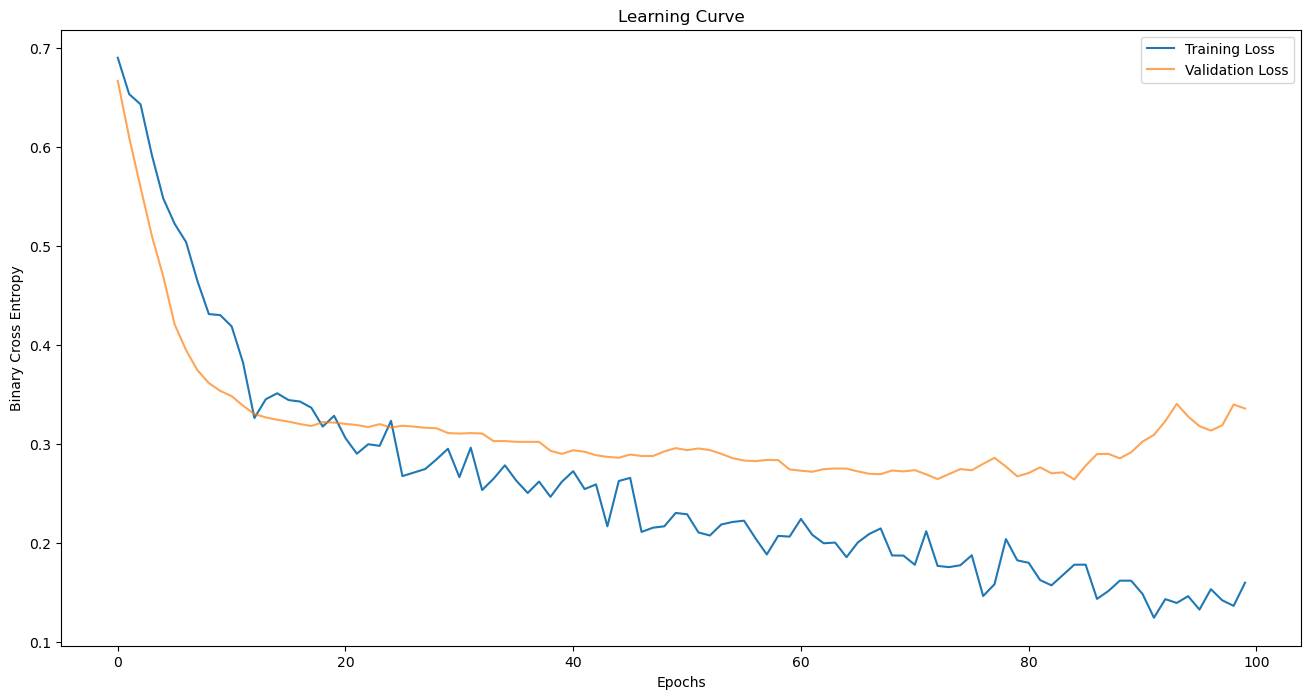

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss',alpha=0.7)
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

## 9

In [16]:
model.evaluate(xtrain,ytrain)

22/22 [==============================] - 0s 1ms/step - loss: 0.1318 - accuracy: 0.9686


[0.1318109929561615, 0.9685714244842529]

In [17]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

10/10 [==============================] - 0s 1ms/step


In [18]:
tr_pred[0:5]

array([[1.0000000e+00],
       [8.2905831e-07],
       [9.9995112e-01],
       [1.4297577e-03],
       [9.9999964e-01]], dtype=float32)

In [19]:
ts_pred[0:5]

array([[7.2945881e-04],
       [9.9985474e-01],
       [8.0321962e-03],
       [3.6694544e-07],
       [8.2803659e-02]], dtype=float32)

In [27]:
threshold = 0.5
tr_pred_class = []
for i in tr_pred:
    if i>=0.5:
        tr_pred_class.append(1)
    else:
        tr_pred_class.append(0)

In [28]:
tr_pred_class[0:5]

[1, 0, 1, 0, 1]

In [29]:
threshold = 0.5
ts_pred_class = []
for i in ts_pred:
    if i>=0.5:
        ts_pred_class.append(1)
    else:
        ts_pred_class.append(0)

In [30]:
ts_pred_class[0:5]

[0, 1, 0, 0, 0]

## 10

In [35]:
from sklearn.metrics import roc_auc_score
tr_acc = roc_auc_score(ytest,ts_pred)
ts_acc = roc_auc_score(ytrain,tr_pred)
tr_acc,ts_acc

(0.9917988946336246, 0.9938306408779285)

## 11

In [31]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ts_pred_class)
cf

array([[154,   4],
       [  7, 135]], dtype=int64)

## 12

<AxesSubplot:>

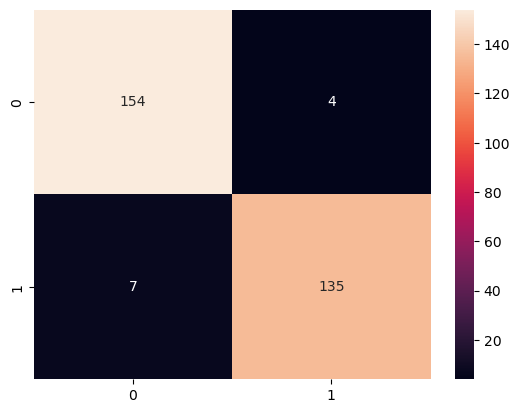

In [37]:
import seaborn as sb
sb.heatmap(cf,annot=True,fmt='d')

## 13

In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ts_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       158
           1       0.97      0.95      0.96       142

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

